In [1]:
"https://inventorum.opi.org.pl/inventorum-process-nlp-web/doc/"

'https://inventorum.opi.org.pl/inventorum-process-nlp-web/doc/'

In [2]:
from scrap_article import scrap_article
from selenium import webdriver

In [3]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--executable_path=/usr/bin/chromedriver')
chrome = webdriver.Chrome(options=chrome_options)

In [31]:
url = "http://wyborcza.pl/7,75399,24841900,specprokurator-mueller-nie-oczyscilismy-trumpa-z-podejrzen.html#S.DT-K.C-B.2-L.1.duzy"

In [32]:
url

'http://wyborcza.pl/7,75399,24841900,specprokurator-mueller-nie-oczyscilismy-trumpa-z-podejrzen.html#S.DT-K.C-B.2-L.1.duzy'

In [33]:
article = scrap_article(chrome, url, True)

In [34]:
from unidecode import unidecode

In [35]:
from json import loads, dumps

In [36]:
type(article)

dict

In [37]:
j = loads(dumps(article, ensure_ascii=False))

In [38]:
from datetime import datetime as dt

In [39]:
with open('data/comments/'+str(126), 'w') as f:
    f.write(str({'row': {
       'comments': j['comments'],
       'timestamp': dt.timestamp(dt.now())
       }
    }))

## Read data

In [40]:
from os import listdir

In [64]:
comments_batch = []
for file_name in listdir('data/comments'):
    with open('data/comments/'+file_name, 'r') as f:
        comments_batch.append(eval(f.read()))

## Remove stop words

In [65]:
from unidecode import unidecode

In [66]:
with open('polish.stopwords.txt', 'r') as f:
    stop_words = f.read().split('\n')

In [108]:
all_comments = []
for j in comments_batch:
    for main_comment in j['row']['comments']:
        comment = {
            "susp" : False,
            "type" : 'main',
            "words": [],
        }
        words = []
        for word in main_comment['main_comment']['body'].split(' '):
            word = word.lower()
            if word not in stop_words:
                comment["words"].append(unidecode(word))
        if len(comment["words"]) != 0:
            comment["susp"] = main_comment['main_comment']["suspicious"]
            all_comments.append(comment)

        for sub_comment in main_comment['sub_comments']:
            comment = {
                "susp" : False,
                "type" : 'sub',
                "words": [],
            }
            for word in sub_comment['body'].split(' '):
                word = word.lower()
                if word not in stop_words:
                    comment["words"].append(unidecode(word))
            if len(comment["words"]) != 0:
                comment["susp"] = sub_comment["suspicious"]
                all_comments.append(comment)

## Calculate average sentence lenght

In [110]:
sentence_lengths = []
for comment in all_comments:
    for sentence in " ".join(comment["words"]).split('.'):
        sentence_lengths.append(len(sentence.split(' ')))

In [111]:
avg_sentence_lenght = round(sum(sentence_lengths) / len(sentence_lengths), 2)

In [112]:
# How many times the second layer should be smaller then first one
avg_sentence_lenght

5.61

## Calculate average number of sentences in comment

In [113]:
comments_sentences_count = []
for comment in all_comments:
    comments_sentences_count.append(len(" ".join(comment["words"])[:-1].split('.')))

In [114]:
avg_sentencte_count = round(sum(comments_sentences_count) / len(comments_sentences_count), 2)

In [115]:
# How many times the third layer should be smaller
avg_sentencte_count

3.26

### Remove special characters

In [116]:
from re import sub

In [120]:
comments = []
for comment in all_comments:
    comments.append({
            "type": comment["type"],
            "susp": comment["susp"],
            "words": [sub(r"[^a-z]", "", x) for x in comment["words"] if sub(r"[^a-z]", "", x) != '']
    })

In [121]:
comments[0]

{'type': 'main',
 'susp': False,
 'words': ['powiedziec',
  'porownaniu',
  'prezesem',
  'pisu',
  'wladza',
  'trampa',
  'mizerna',
  'dalej',
  'toczy',
  'przeciw',
  'sledztw',
  'polsce',
  'kaczynski',
  'kiwnie',
  'palcem',
  'zadnego',
  'sledztwa',
  'bedzie']}

# Lets visualize those two types: suspicious and normal to see whether human or algorithm works well

In [122]:
to_cloud = {
    "susp": [],
    "rest": [],
}
for comment in comments:
    if comment["susp"]:
        for word in comment["words"]:
            to_cloud["susp"].append(word)
    else:
        for word in comment["words"]:
            to_cloud["rest"].append(word)

In [133]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

(-0.5, 1199.5, 299.5, -0.5)

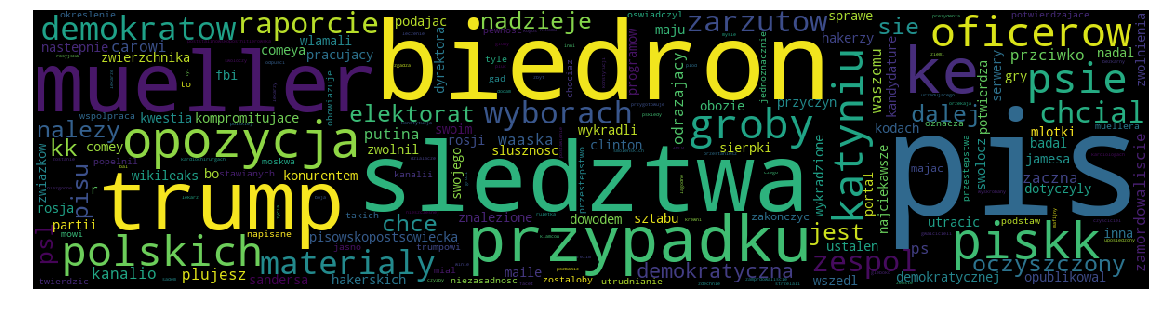

In [143]:
word_could_dict = Counter(to_cloud["susp"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")

(-0.5, 1199.5, 299.5, -0.5)

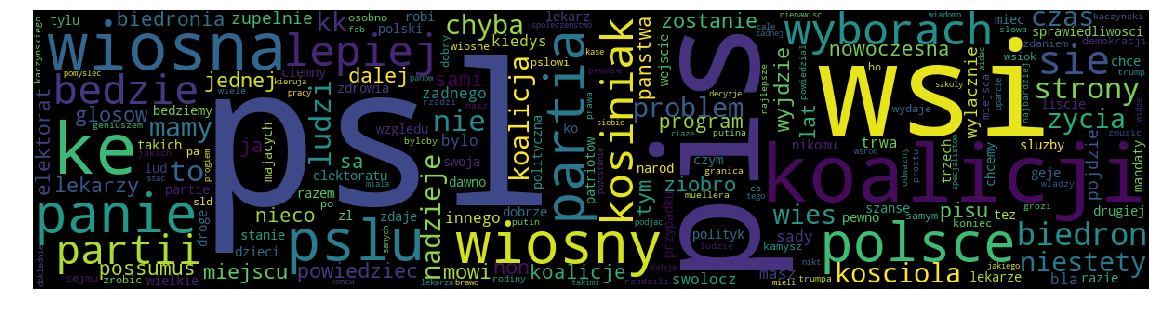

In [142]:
word_could_dict=Counter(to_cloud["rest"])
wordcloud = WordCloud(width = 1200, height = 300).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(20,8))
plt.imshow(wordcloud)
plt.axis("off")